In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split
from tensorflow.python.client import device_lib 

In [2]:
train = pd.read_csv('Data\emnist-letters-train.csv')
test = pd.read_csv('Data\emnist-letters-test.csv')

In [3]:
train_labels = np.array(train.iloc[:,0].values) - 1
train_letters = np.array(train.iloc[:,1:].values)

test_labels = np.array(test.iloc[:,0].values) - 1
test_letters = np.array(test.iloc[:,1:].values)

In [4]:
def reshape_normalize(data):
    data = data / 255.0
    data = data.reshape(len(data), 28, 28, 1)
    return data

In [5]:
def flip_rotate(data):
    data = np.fliplr(data)
    data = np.rot90(data)
    return data 

In [6]:
x_train, x_val, y_train, y_val = train_test_split(train_letters,
                                                  train_labels,
                                                  test_size=0.2,
                                                  random_state=42)

In [7]:
x_train = reshape_normalize(x_train)
x_val = reshape_normalize(x_val)
test_letters = reshape_normalize(test_letters)

print('training set: ', x_train.shape, y_train.shape)
print('validation set: ', x_val.shape, y_val.shape)
print('test set: ', test_letters.shape, test_labels.shape)

training set:  (71039, 28, 28, 1) (71039,)
validation set:  (17760, 28, 28, 1) (17760,)
test set:  (14799, 28, 28, 1) (14799,)


In [8]:
for i in range(len(x_train)):
    x_train[i] = flip_rotate(x_train[i])

for i in range(len(x_val)):
    x_val[i] = flip_rotate(x_val[i])

for i in range(len(test_letters)):
    test_letters[i] = flip_rotate(test_letters[i])

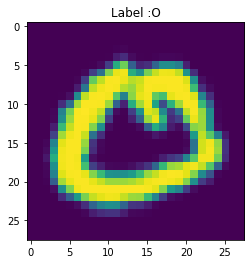

In [9]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

def show_image(image, label):
    image = image.reshape([28, 28])
    # image = np.fliplr(image)
    # image = np.rot90(image)
    plt.title('Label :' + letters[label])
    plt.imshow(image)

n = random.randint(0, len(x_train))
show_image(x_train[n], y_train[n])

In [10]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32, 3, input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dropout (Dropout)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                        

In [11]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 20)

Epoch 1/20
2220/2220 [==============================] - 42s 18ms/step - loss: 0.7173 - accuracy: 0.7807 - val_loss: 0.4288 - val_accuracy: 0.8628
Epoch 2/20
2220/2220 [==============================] - 43s 19ms/step - loss: 0.3954 - accuracy: 0.8737 - val_loss: 0.3438 - val_accuracy: 0.8914
Epoch 3/20
2220/2220 [==============================] - 42s 19ms/step - loss: 0.3294 - accuracy: 0.8908 - val_loss: 0.3182 - val_accuracy: 0.8951
Epoch 4/20
2220/2220 [==============================] - 41s 19ms/step - loss: 0.2911 - accuracy: 0.9019 - val_loss: 0.3194 - val_accuracy: 0.8961
Epoch 5/20
2220/2220 [==============================] - 39s 18ms/step - loss: 0.2640 - accuracy: 0.9107 - val_loss: 0.3079 - val_accuracy: 0.9014
Epoch 6/20
2220/2220 [==============================] - 39s 18ms/step - loss: 0.2452 - accuracy: 0.9141 - val_loss: 0.2976 - val_accuracy: 0.9032
Epoch 7/20
2220/2220 [==============================] - 44s 20ms/step - loss: 0.2258 - accuracy: 0.9204 - val_loss: 0.2906 -

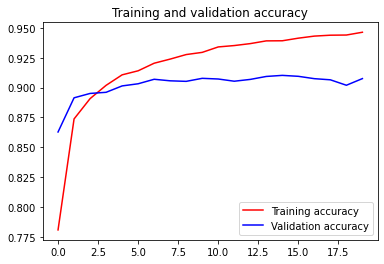

<Figure size 432x288 with 0 Axes>

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

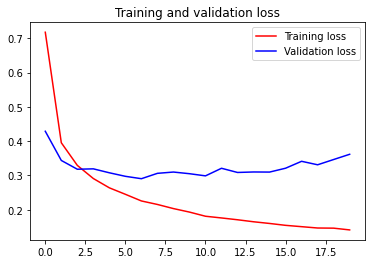

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [14]:
test_loss, test_accuracy = model.evaluate(test_letters, test_labels, verbose = 2)

print("Test Loss: ",test_loss)
print("Test Accuracy: ",test_accuracy)

463/463 - 2s - loss: 0.4133 - accuracy: 0.8970 - 2s/epoch - 5ms/step
Test Loss:  0.41331300139427185
Test Accuracy:  0.8969525098800659


1/1 [==============================] - 0s 30ms/step


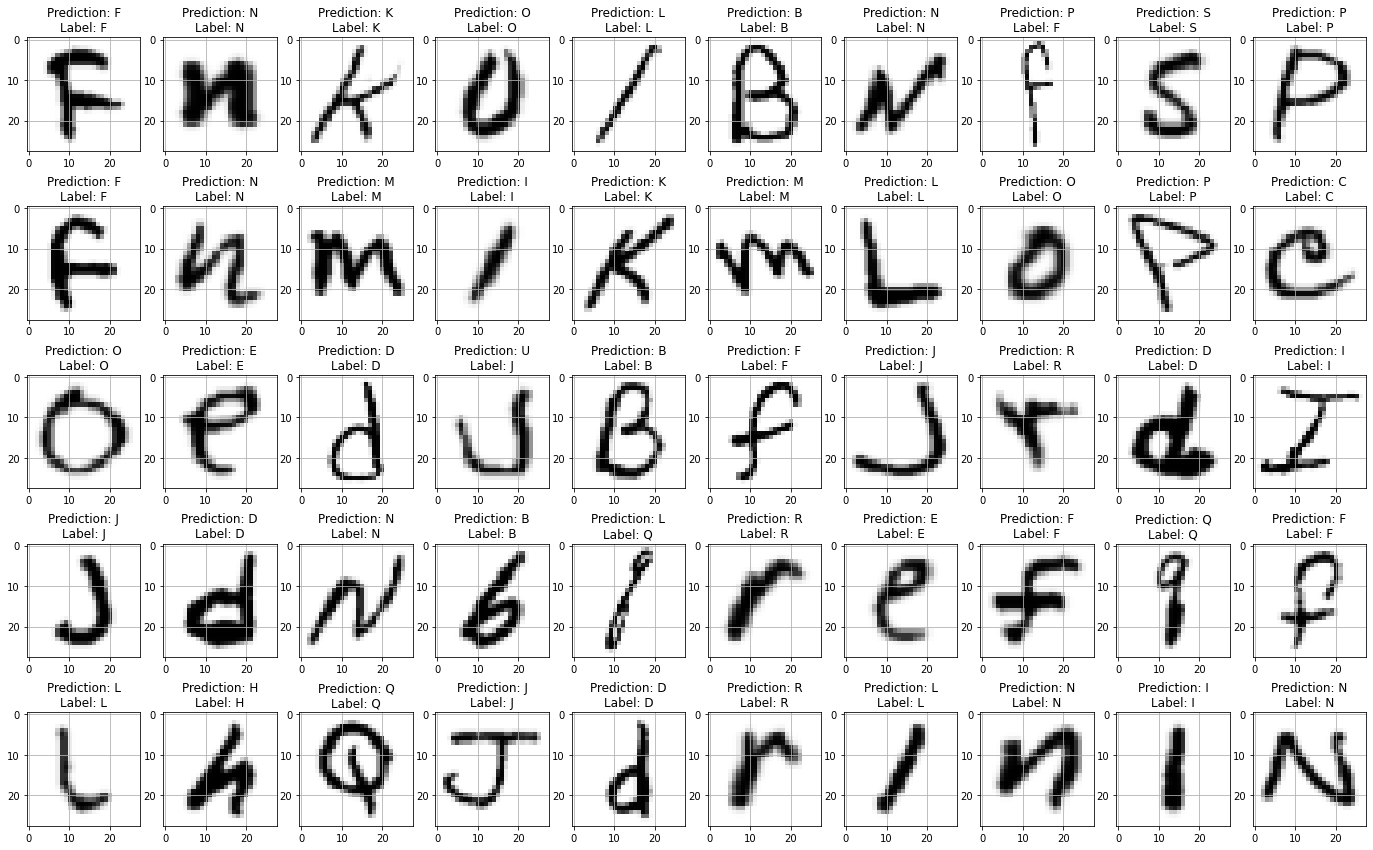

In [15]:
fig, axes = plt.subplots(5,10, figsize=(24,15))
axes = axes.flatten()

for i,ax in enumerate(axes):
    n = random.randint(0, len(test_letters))
    img = np.reshape(test_letters[n], (28,28))
    # img = np.fliplr(img)
    # img = np.rot90(img)
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    pred = letters[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: {}\nLabel: {}".format(pred,letters[test_labels[n]]))
    ax.grid()

In [16]:
model_version = '1'
model_name = 'emnist'
file_name = "emnist_model.h5"
saved_model_path = os.path.join('/Model',model_name, model_version,file_name)
model.save(saved_model_path)

In [17]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./